# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [2]:
def load_data(filename):
    '''
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    '''
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [3]:
def loss(X, Y, w):
    '''
    Calculate the log loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    log_loss = np.sum( [np.log(1 + np.exp( -Y[i] * np.dot(w, X[i]) ) ) for i in range(X.shape[0])] )
    
    return log_loss
    
    pass

def gradient(x, y, w, lamda, N):
    '''
    Calculate the gradient of the loss function + regularization with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        lamda
        N
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    log_gradient = (1 - 1 / (1 + (np.exp(-y * np.dot(w, x) ) ) ) ) * (-y) * x
    regularization = 2 * lamda * w / N
    total_gradient = log_gradient + regularization
    return total_gradient
    
    pass

def SGD(X, Y, w_start, eta, N_epochs, lamda):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        
    '''
    w = w_start
    W = np.array([])
    
    for i in range(N_epochs):
        index = np.random.permutation(len(Y))
        W = np.append(W, w)
        for j in index:
            w = w - eta * gradient(X[j], Y[j], w, lamda, N = X.shape[0])
    
    return w
    
    pass

In [4]:
def normalize(X): # normalize input data X to prevent numerical instability issues (overflow or underflow)
    mean = np.array([])
    std = np.array([])
        
    for i in range(X.shape[1]):
        mean = np.append(mean, X[:, i].mean())
        std = np.append(std, np.std(X[:, i]))
        X[:, i] = (X[:, i] - mean[i]) / std[i]

    return X, mean, std

In [5]:
def RegLogReg(X_train, y_train, X_test, y_test): # l2 regularized log regression using SGD core
    N_epochs = 20000 # each epoch performs one SGD iteration for each point in the training dataset
    eta = 5e-4
    lambdas = [0.00001]
    for i in range(14):
        lambdas.append(lambdas[i]*5)
    Ein = np.array([])
    Eout = np.array([])
    norm = np.array([])
    
    for lamda in lambdas:
        w_start = np.random.uniform(0, 0.01, 14) # initialize weights to small random numbers
        W = SGD(X_train, y_train, w_start, eta, N_epochs, lamda)
        Ein = np.append(Ein, loss(X_train, y_train, W) / X_train.shape[0])
        Eout = np.append(Eout, loss(X_test, y_test, W) / X_test.shape[0])
        norm = np.append(norm, (np.linalg.norm(W)) )
    return lambdas, Ein, Eout, norm
        

In [6]:
# load training data 1
training_data_1 = load_data('./data/wine_training1.txt')
X_train = training_data_1[:, 1:]
y_train_1 = training_data_1[:, :1]

X_train, mean1, std1 = normalize(X_train) # Normalize data before reshape because bias term does not need to normalize
X_train_1 = np.c_[np.ones(X_train.shape[0]), X_train] # add one more column for threshold

# load training data 2
training_data_2 = load_data('./data/wine_training2.txt')
X_train = training_data_2[:, 1:]
y_train_2 = training_data_2[:, :1]

X_train, mean2, std2 = normalize(X_train) # Normalize data before reshape because bias term does not need to normalize
X_train_2 = np.c_[np.ones(X_train.shape[0]), X_train] # add one more column for threshold

# load testing data normalized for training data 1
testing_data = load_data('./data/wine_testing.txt')
X_test = testing_data[:, 1:]
y_test_1 = testing_data[:, :1]

for i in range(X_test.shape[1]):
    X_test[:, i] = (X_test[:, i] - mean1[i]) / std1[i]
X_test_1 = np.c_[np.ones(X_test.shape[0]), X_test] # add one more column for threshold

# load testing data normalized for training data 2
testing_data = load_data('./data/wine_testing.txt')
X_test = testing_data[:, 1:]
y_test_2 = testing_data[:, :1]

for i in range(X_test.shape[1]):
    X_test[:, i] = (X_test[:, i] - mean2[i]) / std2[i]
X_test_2 = np.c_[np.ones(X_test.shape[0]), X_test] # add one more column for threshold


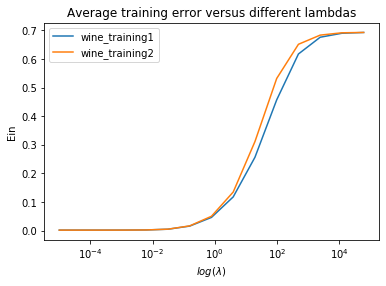

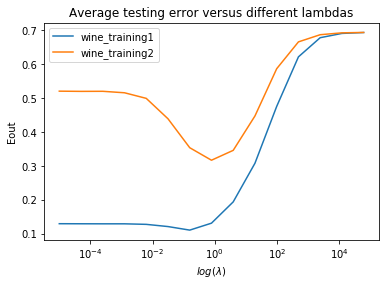

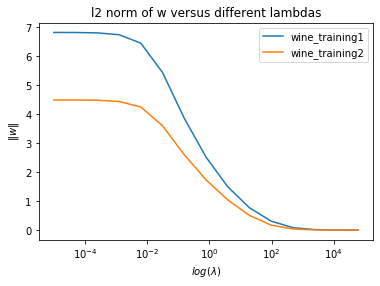

In [7]:
lambdas_1, Ein1, Eout1, norm1 = RegLogReg(X_train_1, y_train_1, X_test_1, y_test_1) 
lambdas_2, Ein2, Eout2, norm2 = RegLogReg(X_train_2, y_train_2, X_test_2, y_test_2)

plt.plot(lambdas_1, Ein1, label = 'wine_training1')
plt.plot(lambdas_2, Ein2, label = 'wine_training2')
plt.xscale('log')
plt.title('Average training error versus different lambdas')
plt.xlabel('$log(\lambda)$')
plt.ylabel('Ein')
plt.legend(loc = 'best')
plt.show()

plt.plot(lambdas_1, Eout1, label = 'wine_training1')
plt.plot(lambdas_2, Eout2, label = 'wine_training2')
plt.xscale('log')
plt.title('Average testing error versus different lambdas')
plt.xlabel('$log(\lambda)$')
plt.ylabel('Eout')
plt.legend(loc = 'best')
plt.show()

plt.plot(lambdas_1, norm1, label = 'wine_training1')
plt.plot(lambdas_2, norm2, label = 'wine_training2')
plt.xscale('log')
plt.title('l2 norm of w versus different lambdas')
plt.xlabel('$log(\lambda)$')
plt.ylabel('$\Vert w \Vert$')
plt.legend(loc = 'best')
plt.show()